<a href="https://www.kaggle.com/code/rkmaurya93/dropout-regression?scriptVersionId=256484407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

2025-08-17 16:45:45.487753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755449145.735534      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755449145.814461      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Generate Data:

In [2]:
x_train=np.linspace(-1,1,20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
x_test=np.linspace(-1,1,20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

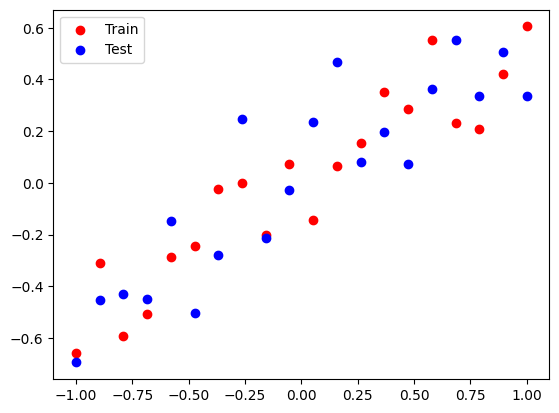

In [6]:
plt.scatter(x_train,y_train,c='red',label='Train')
plt.scatter(x_test,y_test,c='blue',label='Test')
plt.legend()
plt.show()

# Regression Model:

In [7]:
model_1=Sequential()
model_1.add(Dense(128,input_dim=1,activation='relu'))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-17 16:46:03.560364: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
adam=Adam(learning_rate=0.01)

model_1.compile(loss='mean_squared_error', optimizer=adam,metrics=['mean_squared_error'])


In [9]:
history=model_1.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0322 - val_mean_sq

In [10]:
# Evaluate the model
_, train_mse = model_1.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004390215966850519, Test: 0.045800577849149704


In [11]:
y_pred_1=model_1.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


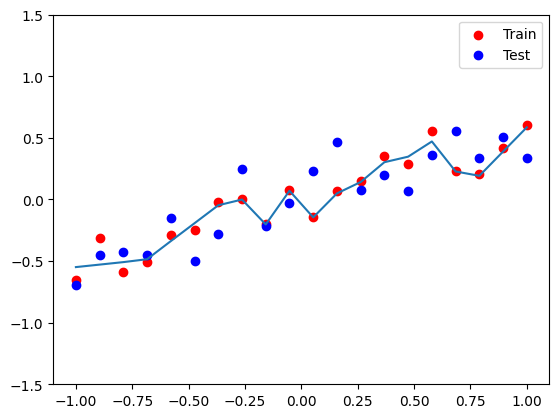

In [12]:
plt.figure()
plt.scatter(x_train,y_train,c='red',label='Train')
plt.scatter(x_test,y_test,c='blue',label='Test')
plt.plot(x_test,y_pred_1)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

# DropOut Model:

In [13]:
model2=Sequential()
model2.add(Dense(128,input_dim=1,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)

In [14]:
model2.compile(optimizer=adam,loss='mse',metrics=['mse'])


In [15]:
drop_out_history=model2.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0470 - val_mse: 0.0470
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0445 - mse: 0.0445 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0196 - mse: 0

In [16]:
# Evaluate the model
_,train_mse=model2.evaluate(x_train,y_train,verbose=0)
_,test_mse=model2.evaluate(x_test,y_test,verbose=0)
print('Train: {},Test: {}'.format(train_mse,test_mse))

Train: 0.011131365783512592,Test: 0.0393412783741951


In [17]:
y_pred_2=model2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


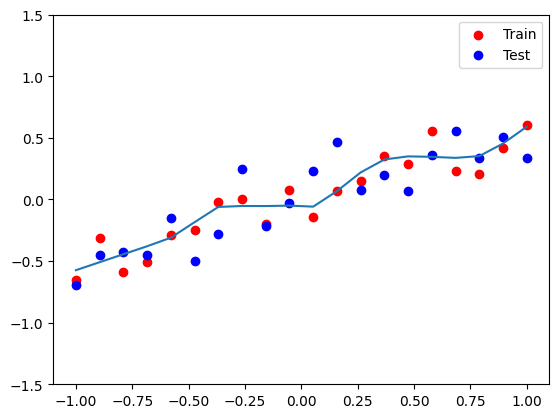

In [18]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()